In [225]:
import matplotlib.pyplot as plt
import pandas as pd

In [211]:
#To print the list/array formatted as string
def convert_words_to_full_text(s): 
    new = "" 
    for x in s: 
        new += x  
    return new 

#Used in LA
def adding_extra_blank_space_to_right(M, s):
    if(len(s)<M):
        count = 0;
        temp_str="";
        for i in range(0,(M-len(s)-1)):
            temp_str+=' ';
        s=s+temp_str
    return (s);

#Used in RA
def adding_extra_blank_space_to_left(M, s):
    if(len(s)<M):
        count = 0;
        temp_str = "";
       
        for i in range(0,(M-len(s))-1):
            temp_str+=' ';
        
        s= temp_str+s;
    return s;

#Used in CA
def adding_extra_blank_space_to_center(M, s):
    s = s.rstrip().lstrip();
    amount_of_blank = (M - len(s))/2;
    
    if(len(s)<M):
        count = 0;
        temp_str = "";
       
        for i in range(0,amount_of_blank-1):
            temp_str+=' ';
        
        s= temp_str+s+temp_str;
    return s;


def get_lenght_array(array):
    l = [];
    for i in range(0,len(array)):
        l.append(len(array[i]))
    return l;

def cost_funcion_based_on_total_number_of_additional_blank_space_LA(M, l, input_text, aligned):
    #trim the string: We will obtain the word1+word2+thespacebetween rstrip()
    #Subtract string - trimString = numberAdditionalBlankSpace.
    c=0;
    
    #aligned-1: ignore last line. We don't need to calculate the last line since it will have is most cases
    #bigger number of additional space.
    for n in range(0,len(aligned)-1):
        total_words_separated_by_one_blank_space = aligned[n].rstrip(); #i+j
        total_additional_blank_space = (len(aligned[n]) - len(total_words_separated_by_one_blank_space));
         
        c+= (total_additional_blank_space);
    
    c= (c)**3;
    return c;


def cost_funcion_based_on_total_number_of_additional_blank_space_RA(M, l, input_text, aligned):
    #left trim the string: We will obtain the word1+word2+thespacebetween lstrip()
    #Subtract string - lefttrimString = numberAdditionalBlankSpace.
    c=0;
    
    #aligned-1: ignore last line. We don't need to calculate the last line since it will have is most cases
    #bigger number of additional space.
    for n in range(0,len(aligned)-1):
        total_words_separated_by_one_blank_space = aligned[n].lstrip() #i+j
        total_additional_blank_space = len(aligned[n]) - len(total_words_separated_by_one_blank_space);
 
        c+= total_additional_blank_space;
    
    c= (c)**3;
    return c;

def cost_funcion_based_on_total_number_of_additional_blank_space_CA(M, l, input_text, aligned):
    c=0;
    
    #aligned-1: ignore last line. We don't need to calculate the last line since it will have is most cases
    #bigger number of additional space.
    for n in range(0,len(aligned)-1):
       # aligned[n].replace("\n", "")
        total_words_separated_by_one_blank_space = aligned[n].replace("\n", "").lstrip().rstrip() #i+j
        total_additional_blank_space = len(aligned[n].replace("\n", "")) - len(total_words_separated_by_one_blank_space);
 
        c+= total_additional_blank_space;
    
    c= (c)**3;
    return c;


#M is line width (maximum no. of characters that can fit in a line)
#l[] is the size of each word of the array/list
#input_text is the array/list of words.
def greedy_left_alignment(M, l, input_text):   
    if (len(l) == 0):
        return 0;
    aligned = []
    count = 0;
    string='';
    for i in range(0, len(l)):
        count += l[i];

        if count<M and ((len(string)+l[i])<M): 
            string+=input_text[i]+" ";

        else:
            string = adding_extra_blank_space_to_right(M, string) 
            aligned.append(string+"\n");
            count = 0;
            
            string=input_text[i]+" ";
        
        #If it's the end the array
        if(i == (len(l)-1)):
            string = adding_extra_blank_space_to_right(M, string)  
            aligned.append(string)

    return aligned;  
        
    
#M is line width (maximum no. of characters that can fit in a line)
#l[] is the size of each word of the array/list
#input_text is the array/list of words.
def greedy_right_alignment(M, l, input_text):
    aligned = []
    if (len(l) == 0):
        return 0;
   
    else:
        count = 0;
        string='';
        for i in range(0, len(l)):
            count += l[i];
        
            if count<M and ((len(string)+l[i])<M):
                string+=input_text[i]+" ";
                
            elif l[i]<M:
                string = adding_extra_blank_space_to_left(M, string.rstrip());

                aligned.append(string+"\n");
                string=input_text[i]+" ";
                 
                count = l[i];
                
             #If it's the end the array
            if(i == (len(l)-1)):
                string = adding_extra_blank_space_to_left(M, string.rstrip())
                aligned.append(string)

    return aligned;


#M is line width (maximum no. of characters that can fit in a line)
#l[] is the size of each word of the array/list
#input_text is the array/list of words.
def greedy_center_alignment(M, l, input_text):
    aligned = []
    if (len(l) == 0):
        return 0;
   
    else:
        count = 0;
        string='';
        for i in range(0, len(l)):
            count += l[i];
        
            if count<M and ((len(string)+l[i])<M):
                string+=input_text[i]+" ";
                
            elif l[i]<M:
                string = adding_extra_blank_space_to_center(M, string);

                aligned.append(string+"\n");
                string=input_text[i]+" ";
                 
                count = l[i];
                
             #If it's the end the array
            if(i == (len(l)-1)):
                string = adding_extra_blank_space_to_center(M, string)
                aligned.append(string)

    return aligned; 



def string_result(index, size, cost, approach, function):
    s = (index,size, cost,approach,function);
    return s;

# Reading Data

In [168]:
#Source: https://drive.google.com/open?id=199kBrawlwjyMDYHiao6LY9VjPm01osxxkrk2lCV3hYQ

input_data = [
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lectus', 'proin', 'nibh', 'nisl', 'condimentum', 'id.', 'Tellus', 'integer', 'feugiat', 'scelerisque', 'varius', 'morbi', 'enim', 'nunc', 'faucibus.', 'Feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Lectus', 'magna', 'fringilla', 'urna', 'porttitor', 'rhoncus.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lacus', 'sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus.', 'Semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Sit', 'amet', 'cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Diam', 'in', 'arcu', 'cursus', 'euismod', 'quis', 'viverra', 'nibh', 'cras', 'pulvinar.', 'Mauris', 'vitae', 'ultricies', 'leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus.', 'Eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque.', 'Blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse', 'platea', 'dictumst', 'quisque.', 'A', 'erat', 'nam', 'at', 'lectus', 'urna.', 'Dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut.', 'Tincidunt', 'praesent', 'semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Condimentum', 'vitae', 'sapien', 'pellentesque', 'habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus.', 'Aliquam', 'ultrices', 'sagittis', 'orci', 'a.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Maecenas', 'pharetra', 'convallis', 'posuere', 'morbi.', 'Purus', 'in', 'mollis', 'nunc', 'sed', 'id', 'semper', 'risus', 'in.', 'Augue', 'mauris', 'augue', 'neque', 'gravida', 'in', 'fermentum', 'et.', 'Arcu', 'bibendum', 'at', 'varius', 'vel', 'pharetra.', 'Sit', 'amet', 'mattis', 'vulputate', 'enim', 'nulla', 'aliquet', 'porttitor.', 'Sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus', 'et', 'malesuada.', 'Leo', 'in', 'vitae', 'turpis', 'massa', 'sed', 'elementum', 'tempus', 'egestas', 'sed.', 'Tortor', 'vitae', 'purus', 'faucibus', 'ornare', 'suspendisse', 'sed', 'nisi', 'lacus', 'sed.', 'Vitae', 'tortor', 'condimentum', 'lacinia', 'quis.', 'Orci', 'a', 'scelerisque', 'purus', 'semper', 'eget', 'duis', 'at.', 'Amet', 'consectetur', 'adipiscing', 'elit', 'ut', 'aliquam', 'purus', 'sit', 'amet', 'luctus.', 'Condimentum', 'lacinia', 'quis', 'vel', 'eros', 'donec.', 'Tincidunt', 'arcu', 'non', 'sodales', 'neque.', 'Nec', 'ultrices', 'dui', 'sapien', 'eget', 'mi', 'proin', 'sed', 'libero.', 'Senectus', 'et', 'netus', 'et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas.', 'Ultricies', 'mi', 'eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque', 'ornare', 'aenean.', 'Netus', 'et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas.', '\n', 'Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'duis.', 'Viverra', 'mauris', 'in', 'aliquam', 'sem', 'fringilla', 'ut', 'morbi', 'tincidunt.', 'Tristique', 'magna', 'sit', 'amet', 'purus', 'gravida', 'quis', 'blandit', 'turpis', 'cursus.', 'Ultricies', 'mi', 'eget', 'mauris', 'pharetra.', 'Quis', 'auctor', 'elit', 'sed', 'vulputate.', 'Tellus', 'pellentesque', 'eu', 'tincidunt', 'tortor', 'aliquam', 'nulla', 'facilisi.', 'Nulla', 'facilisi', 'etiam', 'dignissim', 'diam.', 'Lectus', 'sit', 'amet', 'est', 'placerat', 'in', 'egestas', 'erat.', 'Consectetur', 'lorem', 'donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie.', 'Quam', 'pellentesque', 'nec', 'nam', 'aliquam', 'sem.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Maecenas', 'pharetra', 'convallis', 'posuere', 'morbi.', 'Purus', 'in', 'mollis', 'nunc', 'sed', 'id', 'semper', 'risus', 'in.', 'Augue', 'mauris', 'augue', 'neque', 'gravida', 'in', 'fermentum', 'et.', 'Arcu', 'bibendum', 'at', 'varius', 'vel', 'pharetra.', 'Sit', 'amet', 'mattis', 'vulputate', 'enim', 'nulla', 'aliquet', 'porttitor.', 'Sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus', 'et', 'malesuada.', 'Leo', 'in', 'vitae', 'turpis', 'massa', 'sed', 'elementum', 'tempus', 'egestas', 'sed.', 'Tortor', 'vitae', 'purus', 'faucibus', 'ornare', 'suspendisse', 'sed', 'nisi', 'lacus', 'sed.', 'Vitae', 'tortor', 'condimentum', 'lacinia', 'quis.', 'Orci', 'a', 'scelerisque', 'purus', 'semper', 'eget', 'duis', 'at.', 'Amet', 'consectetur', 'adipiscing', 'elit', 'ut', 'aliquam', 'purus', 'sit', 'amet', 'luctus.', 'Condimentum', 'lacinia', 'quis', 'vel', 'eros', 'donec.', 'Tincidunt', 'arcu', 'non', 'sodales', 'neque.', 'Nec', 'ultrices', 'dui', 'sapien', 'eget', 'mi', 'proin', 'sed', 'libero.', 'Senectus', 'et', 'netus', 'et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas.', 'Ultricies', 'mi', 'eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque', 'ornare', 'aenean.', 'Netus', 'et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas.', '\n', 'Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'duis.', 'Viverra', 'mauris', 'in', 'aliquam', 'sem', 'fringilla', 'ut', 'morbi', 'tincidunt.', 'Tristique', 'magna', 'sit', 'amet', 'purus', 'gravida', 'quis', 'blandit', 'turpis', 'cursus.', 'Ultricies', 'mi', 'eget', 'mauris', 'pharetra.', 'Quis', 'auctor', 'elit', 'sed', 'vulputate.', 'Tellus', 'pellentesque', 'eu', 'tincidunt', 'tortor', 'aliquam', 'nulla', 'facilisi.', 'Nulla', 'facilisi', 'etiam', 'dignissim', 'diam.', 'Lectus', 'sit', 'amet', 'est', 'placerat', 'in', 'egestas', 'erat.', 'Consectetur', 'lorem', 'donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie.', 'Quam', 'pellentesque', 'nec', 'nam', 'aliquam', 'sem.', '\n Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lacus', 'sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus.', 'Semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Sit', 'amet', 'cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Diam', 'in', 'arcu', 'cursus', 'euismod', 'quis', 'viverra', 'nibh', 'cras', 'pulvinar.', 'Mauris', 'vitae', 'ultricies', 'leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus.', 'Eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque.', 'Blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse', 'platea', 'dictumst', 'quisque.', 'A', 'erat', 'nam', 'at', 'lectus', 'urna.', 'Dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut.', 'Tincidunt', 'praesent', 'semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Condimentum', 'vitae', 'sapien', 'pellentesque', 'habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus.', 'Aliquam', 'ultrices', 'sagittis', 'orci', 'a.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lacus', 'sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus.', 'Semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Sit', 'amet', 'cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Diam', 'in', 'arcu', 'cursus', 'euismod', 'quis', 'viverra', 'nibh', 'cras', 'pulvinar.', 'Mauris', 'vitae', 'ultricies', 'leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus.', 'Eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque.', 'Blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse', 'platea', 'dictumst', 'quisque.', 'A', 'erat', 'nam', 'at', 'lectus', 'urna.', 'Dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut.', 'Tincidunt', 'praesent', 'semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Condimentum', 'vitae', 'sapien', 'pellentesque', 'habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus.', 'Aliquam', 'ultrices', 'sagittis', 'orci', 'a.', '\n Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Maecenas', 'pharetra', 'convallis', 'posuere', 'morbi.', 'Purus', 'in', 'mollis', 'nunc', 'sed', 'id', 'semper', 'risus', 'in.', 'Augue', 'mauris', 'augue', 'neque', 'gravida', 'in', 'fermentum', 'et.', 'Arcu', 'bibendum', 'at', 'varius', 'vel', 'pharetra.', 'Sit', 'amet', 'mattis', 'vulputate', 'enim', 'nulla', 'aliquet', 'porttitor.', 'Sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus', 'et', 'malesuada.', 'Leo', 'in', 'vitae', 'turpis', 'massa', 'sed', 'elementum', 'tempus', 'egestas', 'sed.', 'Tortor', 'vitae', 'purus', 'faucibus', 'ornare', 'suspendisse', 'sed', 'nisi', 'lacus', 'sed.', 'Vitae', 'tortor', 'condimentum', 'lacinia', 'quis.', 'Orci', 'a', 'scelerisque', 'purus', 'semper', 'eget', 'duis', 'at.', 'Amet', 'consectetur', 'adipiscing', 'elit', 'ut', 'aliquam', 'purus', 'sit', 'amet', 'luctus.', 'Condimentum', 'lacinia', 'quis', 'vel', 'eros', 'donec.', 'Tincidunt', 'arcu', 'non', 'sodales', 'neque.', 'Nec', 'ultrices', 'dui', 'sapien', 'eget', 'mi', 'proin', 'sed', 'libero.', 'Senectus', 'et', 'netus', 'et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas.', 'Ultricies', 'mi', 'eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque', 'ornare', 'aenean.', 'Netus', 'et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas.', '\n', 'Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'duis.', 'Viverra', 'mauris', 'in', 'aliquam', 'sem', 'fringilla', 'ut', 'morbi', 'tincidunt.', 'Tristique', 'magna', 'sit', 'amet', 'purus', 'gravida', 'quis', 'blandit', 'turpis', 'cursus.', 'Ultricies', 'mi', 'eget', 'mauris', 'pharetra.', 'Quis', 'auctor', 'elit', 'sed', 'vulputate.', 'Tellus', 'pellentesque', 'eu', 'tincidunt', 'tortor', 'aliquam', 'nulla', 'facilisi.', 'Nulla', 'facilisi', 'etiam', 'dignissim', 'diam.', 'Lectus', 'sit', 'amet', 'est', 'placerat', 'in', 'egestas', 'erat.', 'Consectetur', 'lorem', 'donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie.', 'Quam', 'pellentesque', 'nec', 'nam', 'aliquam', 'sem.', '\n Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lacus', 'sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus.', 'Semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Sit', 'amet', 'cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Diam', 'in', 'arcu', 'cursus', 'euismod', 'quis', 'viverra', 'nibh', 'cras', 'pulvinar.', 'Mauris', 'vitae', 'ultricies', 'leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus.', 'Eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque.', 'Blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse', 'platea', 'dictumst', 'quisque.', 'A', 'erat', 'nam', 'at', 'lectus', 'urna.', 'Dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut.', 'Tincidunt', 'praesent', 'semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Condimentum', 'vitae', 'sapien', 'pellentesque', 'habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus.', 'Aliquam', 'ultrices', 'sagittis', 'orci', 'a.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Accumsan', 'lacus', 'vel', 'facilisis', 'volutpat', 'est', 'velit.', 'A', 'condimentum', 'vitae', 'sapien', 'pellentesque.', 'Massa', 'enim', 'nec', 'dui', 'nunc', 'mattis.', 'Blandit', 'massa', 'enim', 'nec', 'dui.', 'Habitasse', 'platea', 'dictumst', 'quisque', 'sagittis', 'purus', 'sit', 'amet.', 'Malesuada', 'fames', 'ac', 'turpis', 'egestas', 'sed.', 'Porttitor', 'massa', 'id', 'neque', 'aliquam', 'vestibulum', 'morbi.', 'Ultrices', 'dui', 'sapien', 'eget', 'mi', 'proin', 'sed.', 'Potenti', 'nullam', 'ac', 'tortor', 'vitae', 'purus', 'faucibus', 'ornare', 'suspendisse.', 'Sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus', 'feugiat', 'in.', 'Id', 'semper', 'risus', 'in', 'hendrerit', 'gravida', 'rutrum', 'quisque.', 'Ut', 'faucibus', 'pulvinar', 'elementum', 'integer', 'enim', 'neque', 'volutpat.', 'Pharetra', 'pharetra', 'massa', 'massa', 'ultricies.', 'Nunc', 'lobortis', 'mattis', 'aliquam', 'faucibus', 'purus', 'in.', 'Fusce', 'ut', 'placerat', 'orci', 'nulla', 'pellentesque', 'dignissim', 'enim.', '\n', 'At', 'varius', 'vel', 'pharetra', 'vel', 'turpis', 'nunc.', 'Sit', 'amet', 'dictum', 'sit', 'amet.', 'Ut', 'lectus', 'arcu', 'bibendum', 'at', 'varius.', 'Nunc', 'lobortis', 'mattis', 'aliquam', 'faucibus.', 'Pharetra', 'sit', 'amet', 'aliquam', 'id', 'diam', 'maecenas', 'ultricies', 'mi', 'eget.', 'Consectetur', 'lorem', 'donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie.', 'At', 'tellus', 'at', 'urna', 'condimentum', 'mattis', 'pellentesque.', 'Elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est.', 'Tellus', 'rutrum', 'tellus', 'pellentesque', 'eu', 'tincidunt', 'tortor', 'aliquam', 'nulla', 'facilisi.', 'Dolor', 'magna', 'eget', 'est', 'lorem', 'ipsum', 'dolor', 'sit', 'amet.', 'Aenean', 'vel', 'elit', 'scelerisque', 'mauris', 'pellentesque', 'pulvinar', 'pellentesque.', 'Praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est', 'ullamcorper', 'eget.', 'Eget', 'aliquet', 'nibh', 'praesent', 'tristique.', 'Iaculis', 'nunc', 'sed', 'augue', 'lacus', 'viverra', 'vitae.', 'Elit', 'sed', 'vulputate', 'mi', 'sit', 'amet', 'mauris.', 'Mattis', 'pellentesque', 'id', 'nibh', 'tortor.', 'Id', 'neque', 'aliquam', 'vestibulum', 'morbi', 'blandit', 'cursus', 'risus', 'at', 'ultrices.', '\n', 'Enim', 'ut', 'sem', 'viverra', 'aliquet', 'eget', 'sit', 'amet.', 'Sit', 'amet', 'venenatis', 'urna', 'cursus', 'eget', 'nunc', 'scelerisque', 'viverra.', 'Pharetra', 'vel', 'turpis', 'nunc', 'eget.', 'Massa', 'tempor', 'nec', 'feugiat', 'nisl', 'pretium', 'fusce.', 'At', 'quis', 'risus', 'sed', 'vulputate', 'odio', 'ut', 'enim', 'blandit', 'volutpat.', 'Tempus', 'imperdiet', 'nulla', 'malesuada', 'pellentesque', 'elit', 'eget', 'gravida', 'cum.', 'Sagittis', 'eu', 'volutpat', 'odio', 'facilisis', 'mauris', 'sit', 'amet.', 'Ullamcorper', 'eget', 'nulla', 'facilisi', 'etiam', 'dignissim', 'diam', 'quis', 'enim', 'lobortis.', 'Consectetur', 'adipiscing', 'elit', 'duis', 'tristique', 'sollicitudin', 'nibh', 'sit', 'amet.', 'Eu', 'turpis', 'egestas', 'pretium', 'aenean', 'pharetra', 'magna.', 'Commodo', 'ullamcorper', 'a', 'lacus', 'vestibulum', 'sed', 'arcu', 'non', 'odio', 'euismod.', 'In', 'aliquam', 'sem', 'fringilla', 'ut', 'morbi', 'tincidunt', 'augue', 'interdum', 'velit.', 'Cras', 'pulvinar', 'mattis', 'nunc', 'sed', 'blandit', 'libero', 'volutpat.', '\n', 'Pellentesque', 'id', 'nibh', 'tortor', 'id', 'aliquet.', 'Suscipit', 'adipiscing', 'bibendum', 'est', 'ultricies.', 'Et', 'molestie', 'ac', 'feugiat', 'sed', 'lectus', 'vestibulum.', 'Non', 'arcu', 'risus', 'quis', 'varius', 'quam', 'quisque', 'id', 'diam', 'vel.', 'Vulputate', 'odio', 'ut', 'enim', 'blandit', 'volutpat', 'maecenas', 'volutpat', 'blandit.', 'Faucibus', 'ornare', 'suspendisse', 'sed', 'nisi', 'lacus', 'sed', 'viverra', 'tellus', 'in.', 'Vitae', 'semper', 'quis', 'lectus', 'nulla', 'at', 'volutpat', 'diam', 'ut', 'venenatis.', 'Venenatis', 'urna', 'cursus', 'eget', 'nunc', 'scelerisque', 'viverra', 'mauris.', 'Mollis', 'nunc', 'sed', 'id', 'semper.', 'Quam', 'elementum', 'pulvinar', 'etiam', 'non', 'quam', 'lacus', 'suspendisse', 'faucibus', 'interdum.', 'Odio', 'ut', 'sem', 'nulla', 'pharetra', 'diam', 'sit.', 'Tempor', 'id', 'eu', 'nisl', 'nunc', 'mi', 'ipsum.', 'Mi', 'sit', 'amet', 'mauris', 'commodo', 'quis', 'imperdiet', 'massa', 'tincidunt.', 'Suscipit', 'tellus', 'mauris', 'a', 'diam', 'maecenas', 'sed', 'enim', 'ut', 'sem.', 'Enim', 'praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est', 'ullamcorper.', 'Pellentesque', 'habitant', 'morbi', 'tristique', 'senectus.', 'Adipiscing', 'commodo', 'elit', 'at', 'imperdiet', 'dui.', 'Aliquet', 'bibendum', 'enim', 'facilisis', 'gravida', 'neque', 'convallis.', 'Sed', 'blandit', 'libero', 'volutpat', 'sed', 'cras', 'ornare', 'arcu.', 'Leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus', 'commodo', 'viverra', 'maecenas', 'accumsan.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Adipiscing', 'diam', 'donec', 'adipiscing', 'tristique', 'risus.', 'Leo', 'urna', 'molestie', 'at', 'elementum', 'eu', 'facilisis', 'sed', 'odio.', 'Sed', 'odio', 'morbi', 'quis', 'commodo.', 'Aliquet', 'nec', 'ullamcorper', 'sit', 'amet', 'risus', 'nullam', 'eget.', 'Ut', 'venenatis', 'tellus', 'in', 'metus', 'vulputate', 'eu', 'scelerisque', 'felis', 'imperdiet.', 'Massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac', 'feugiat', 'sed', 'lectus.', 'Donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac.', 'Sem', 'et', 'tortor', 'consequat', 'id', 'porta', 'nibh', 'venenatis', 'cras.', 'Eget', 'gravida', 'cum', 'sociis', 'natoque.', '\n', 'Tempor', 'nec', 'feugiat', 'nisl', 'pretium', 'fusce', 'id.', 'Eros', 'in', 'cursus', 'turpis', 'massa', 'tincidunt', 'dui', 'ut', 'ornare.', 'Sem', 'nulla', 'pharetra', 'diam', 'sit', 'amet.', 'Elementum', 'facilisis', 'leo', 'vel', 'fringilla.', 'Hendrerit', 'dolor', 'magna', 'eget', 'est.', 'Risus', 'ultricies', 'tristique', 'nulla', 'aliquet', 'enim', 'tortor', 'at.', 'Sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'ut', 'aliquam', 'purus.', 'Tellus', 'cras', 'adipiscing', 'enim', 'eu', 'turpis', 'egestas', 'pretium.', 'Interdum', 'velit', 'laoreet', 'id', 'donec', 'ultrices.', 'Enim', 'neque', 'volutpat', 'ac', 'tincidunt', 'vitae', 'semper', 'quis.', 'Eget', 'aliquet', 'nibh', 'praesent', 'tristique', 'magna', 'sit', 'amet', 'purus', 'gravida.', 'Venenatis', 'lectus', 'magna', 'fringilla', 'urna', 'porttitor.', 'Congue', 'eu', 'consequat', 'ac', 'felis', 'donec', 'et', 'odio.', 'Mattis', 'vulputate', 'enim', 'nulla', 'aliquet', 'porttitor.', 'Est', 'velit', 'egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Amet', 'est', 'placerat', 'in', 'egestas', 'erat', 'imperdiet', 'sed.', '\n', 'A', 'lacus', 'vestibulum', 'sed', 'arcu', 'non.', 'Suscipit', 'adipiscing', 'bibendum', 'est', 'ultricies', 'integer', 'quis', 'auctor.', 'Donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac.', 'Arcu', 'odio', 'ut', 'sem', 'nulla', 'pharetra.', 'Hendrerit', 'dolor', 'magna', 'eget', 'est.', 'Scelerisque', 'fermentum', 'dui', 'faucibus', 'in', 'ornare.', 'Pretium', 'lectus', 'quam', 'id', 'leo', 'in', 'vitae.', 'Massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac', 'feugiat', 'sed.', 'Eget', 'magna', 'fermentum', 'iaculis', 'eu', 'non', 'diam.', 'Urna', 'condimentum', 'mattis', 'pellentesque', 'id', 'nibh', 'tortor', 'id', 'aliquet', 'lectus.', 'Tincidunt', 'arcu', 'non', 'sodales', 'neque', 'sodales', 'ut', 'etiam', 'sit.', '\n', 'Euismod', 'in', 'pellentesque', 'massa', 'placerat', 'duis', 'ultricies', 'lacus', 'sed.', 'Amet', 'commodo', 'nulla', 'facilisi', 'nullam', 'vehicula', 'ipsum', 'a', 'arcu', 'cursus.', 'Non', 'quam', 'lacus', 'suspendisse', 'faucibus', 'interdum', 'posuere', 'lorem', 'ipsum', 'dolor.', 'Gravida', 'quis', 'blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse.', 'Lectus', 'sit', 'amet', 'est', 'placerat', 'in.', 'Quis', 'hendrerit', 'dolor', 'magna', 'eget.', 'Enim', 'nunc', 'faucibus', 'a', 'pellentesque.', 'Est', 'ultricies', 'integer', 'quis', 'auctor', 'elit', 'sed', 'vulputate', 'mi', 'sit.', 'Purus', 'non', 'enim', 'praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est.', 'Suspendisse', 'potenti', 'nullam', 'ac', 'tortor', 'vitae', 'purus', 'faucibus.', 'Ut', 'ornare', 'lectus', 'sit', 'amet', 'est', 'placerat.', 'Id', 'aliquet', 'lectus', 'proin', 'nibh', 'nisl', 'condimentum.', 'Libero', 'enim', 'sed', 'faucibus', 'turpis', 'in', 'eu', 'mi.', 'Pellentesque', 'adipiscing', 'commodo', 'elit', 'at', 'imperdiet.', 'Pellentesque', 'massa', 'placerat', 'duis', 'ultricies', 'lacus', 'sed', 'turpis', 'tincidunt', 'id.', 'Nec', 'feugiat', 'in', 'fermentum', 'posuere', 'urna.', '\n', 'Massa', 'tincidunt', 'dui', 'ut', 'ornare', 'lectus', 'sit', 'amet', 'est', 'placerat.', 'Aliquet', 'nec', 'ullamcorper', 'sit', 'amet', 'risus', 'nullam.', 'Massa', 'tempor', 'nec', 'feugiat', 'nisl.', 'Sit', 'amet', 'facilisis', 'magna', 'etiam.', 'Tempor', 'id', 'eu', 'nisl', 'nunc.', 'Facilisi', 'nullam', 'vehicula', 'ipsum', 'a', 'arcu.', 'Lorem', 'mollis', 'aliquam', 'ut', 'porttitor.', 'Tristique', 'senectus', 'et', 'netus', 'et', 'malesuada', 'fames', 'ac', 'turpis.', 'Nisi', 'quis', 'eleifend', 'quam', 'adipiscing', 'vitae', 'proin', 'sagittis', 'nisl.', 'A', 'scelerisque', 'purus', 'semper', 'eget', 'duis.', 'Odio', 'morbi', 'quis', 'commodo', 'odio', 'aenean', 'sed', 'adipiscing.', 'Sed', 'cras', 'ornare', 'arcu', 'dui.', 'Et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas', 'maecenas', 'pharetra', 'convallis', 'posuere.', 'Eget', 'gravida', 'cum', 'sociis', 'natoque', 'penatibus', 'et', 'magnis', 'dis', 'parturient.', 'Volutpat', 'est', 'velit', 'egestas', 'dui', 'id', 'ornare', 'arcu', 'odio.', '\n', 'Eleifend', 'donec', 'pretium', 'vulputate', 'sapien', 'nec', 'sagittis', 'aliquam.', 'Diam', 'phasellus', 'vestibulum', 'lorem', 'sed', 'risus.', 'Ultricies', 'integer', 'quis', 'auctor', 'elit', 'sed', 'vulputate', 'mi.', 'Volutpat', 'diam', 'ut', 'venenatis', 'tellus', 'in.', 'Vivamus', 'arcu', 'felis', 'bibendum', 'ut.', 'Mauris', 'pharetra', 'et', 'ultrices', 'neque', 'ornare', 'aenean', 'euismod', 'elementum', 'nisi.', 'Enim', 'eu', 'turpis', 'egestas', 'pretium', 'aenean', 'pharetra.', 'Nec', 'sagittis', 'aliquam', 'malesuada', 'bibendum', 'arcu', 'vitae', 'elementum', 'curabitur.', 'Nisi', 'est', 'sit', 'amet', 'facilisis', 'magna', 'etiam', 'tempor', 'orci', 'eu.', 'Ut', 'diam', 'quam', 'nulla', 'porttitor', 'massa', 'id', 'neque.', 'Quam', 'pellentesque', 'nec', 'nam', 'aliquam', 'sem', 'et', 'tortor', 'consequat', 'id.', 'Lorem', 'sed', 'risus', 'ultricies', 'tristique', 'nulla', 'aliquet', 'enim', 'tortor.', 'Aliquet', 'enim', 'tortor', 'at', 'auctor', 'urna.', 'Cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Volutpat', 'blandit', 'aliquam', 'etiam', 'erat', 'velit', 'scelerisque', 'in', 'dictum', 'non.', 'Accumsan', 'sit', 'amet', 'nulla', 'facilisi.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lacus', 'sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus.', 'Semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Sit', 'amet', 'cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Diam', 'in', 'arcu', 'cursus', 'euismod', 'quis', 'viverra', 'nibh', 'cras', 'pulvinar.', 'Mauris', 'vitae', 'ultricies', 'leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus.', 'Eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque.', 'Blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse', 'platea', 'dictumst', 'quisque.', 'A', 'erat', 'nam', 'at', 'lectus', 'urna.', 'Dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut.', 'Tincidunt', 'praesent', 'semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Condimentum', 'vitae', 'sapien', 'pellentesque', 'habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus.', 'Aliquam', 'ultrices', 'sagittis', 'orci', 'a.', '\nLorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Adipiscing', 'diam', 'donec', 'adipiscing', 'tristique', 'risus.', 'Leo', 'urna', 'molestie', 'at', 'elementum', 'eu', 'facilisis', 'sed', 'odio.', 'Sed', 'odio', 'morbi', 'quis', 'commodo.', 'Aliquet', 'nec', 'ullamcorper', 'sit', 'amet', 'risus', 'nullam', 'eget.', 'Ut', 'venenatis', 'tellus', 'in', 'metus', 'vulputate', 'eu', 'scelerisque', 'felis', 'imperdiet.', 'Massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac', 'feugiat', 'sed', 'lectus.', 'Donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac.', 'Sem', 'et', 'tortor', 'consequat', 'id', 'porta', 'nibh', 'venenatis', 'cras.', 'Eget', 'gravida', 'cum', 'sociis', 'natoque.', '\n', 'Tempor', 'nec', 'feugiat', 'nisl', 'pretium', 'fusce', 'id.', 'Eros', 'in', 'cursus', 'turpis', 'massa', 'tincidunt', 'dui', 'ut', 'ornare.', 'Sem', 'nulla', 'pharetra', 'diam', 'sit', 'amet.', 'Elementum', 'facilisis', 'leo', 'vel', 'fringilla.', 'Hendrerit', 'dolor', 'magna', 'eget', 'est.', 'Risus', 'ultricies', 'tristique', 'nulla', 'aliquet', 'enim', 'tortor', 'at.', 'Sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'ut', 'aliquam', 'purus.', 'Tellus', 'cras', 'adipiscing', 'enim', 'eu', 'turpis', 'egestas', 'pretium.', 'Interdum', 'velit', 'laoreet', 'id', 'donec', 'ultrices.', 'Enim', 'neque', 'volutpat', 'ac', 'tincidunt', 'vitae', 'semper', 'quis.', 'Eget', 'aliquet', 'nibh', 'praesent', 'tristique', 'magna', 'sit', 'amet', 'purus', 'gravida.', 'Venenatis', 'lectus', 'magna', 'fringilla', 'urna', 'porttitor.', 'Congue', 'eu', 'consequat', 'ac', 'felis', 'donec', 'et', 'odio.', 'Mattis', 'vulputate', 'enim', 'nulla', 'aliquet', 'porttitor.', 'Est', 'velit', 'egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Amet', 'est', 'placerat', 'in', 'egestas', 'erat', 'imperdiet', 'sed.', '\n', 'A', 'lacus', 'vestibulum', 'sed', 'arcu', 'non.', 'Suscipit', 'adipiscing', 'bibendum', 'est', 'ultricies', 'integer', 'quis', 'auctor.', 'Donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac.', 'Arcu', 'odio', 'ut', 'sem', 'nulla', 'pharetra.', 'Hendrerit', 'dolor', 'magna', 'eget', 'est.', 'Scelerisque', 'fermentum', 'dui', 'faucibus', 'in', 'ornare.', 'Pretium', 'lectus', 'quam', 'id', 'leo', 'in', 'vitae.', 'Massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac', 'feugiat', 'sed.', 'Eget', 'magna', 'fermentum', 'iaculis', 'eu', 'non', 'diam.', 'Urna', 'condimentum', 'mattis', 'pellentesque', 'id', 'nibh', 'tortor', 'id', 'aliquet', 'lectus.', 'Tincidunt', 'arcu', 'non', 'sodales', 'neque', 'sodales', 'ut', 'etiam', 'sit.', '\n', 'Euismod', 'in', 'pellentesque', 'massa', 'placerat', 'duis', 'ultricies', 'lacus', 'sed.', 'Amet', 'commodo', 'nulla', 'facilisi', 'nullam', 'vehicula', 'ipsum', 'a', 'arcu', 'cursus.', 'Non', 'quam', 'lacus', 'suspendisse', 'faucibus', 'interdum', 'posuere', 'lorem', 'ipsum', 'dolor.', 'Gravida', 'quis', 'blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse.', 'Lectus', 'sit', 'amet', 'est', 'placerat', 'in.', 'Quis', 'hendrerit', 'dolor', 'magna', 'eget.', 'Enim', 'nunc', 'faucibus', 'a', 'pellentesque.', 'Est', 'ultricies', 'integer', 'quis', 'auctor', 'elit', 'sed', 'vulputate', 'mi', 'sit.', 'Purus', 'non', 'enim', 'praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est.', 'Suspendisse', 'potenti', 'nullam', 'ac', 'tortor', 'vitae', 'purus', 'faucibus.', 'Ut', 'ornare', 'lectus', 'sit', 'amet', 'est', 'placerat.', 'Id', 'aliquet', 'lectus', 'proin', 'nibh', 'nisl', 'condimentum.', 'Libero', 'enim', 'sed', 'faucibus', 'turpis', 'in', 'eu', 'mi.', 'Pellentesque', 'adipiscing', 'commodo', 'elit', 'at', 'imperdiet.', 'Pellentesque', 'massa', 'placerat', 'duis', 'ultricies', 'lacus', 'sed', 'turpis', 'tincidunt', 'id.', 'Nec', 'feugiat', 'in', 'fermentum', 'posuere', 'urna.', '\n', 'Massa', 'tincidunt', 'dui', 'ut', 'ornare', 'lectus', 'sit', 'amet', 'est', 'placerat.', 'Aliquet', 'nec', 'ullamcorper', 'sit', 'amet', 'risus', 'nullam.', 'Massa', 'tempor', 'nec', 'feugiat', 'nisl.', 'Sit', 'amet', 'facilisis', 'magna', 'etiam.', 'Tempor', 'id', 'eu', 'nisl', 'nunc.', 'Facilisi', 'nullam', 'vehicula', 'ipsum', 'a', 'arcu.', 'Lorem', 'mollis', 'aliquam', 'ut', 'porttitor.', 'Tristique', 'senectus', 'et', 'netus', 'et', 'malesuada', 'fames', 'ac', 'turpis.', 'Nisi', 'quis', 'eleifend', 'quam', 'adipiscing', 'vitae', 'proin', 'sagittis', 'nisl.', 'A', 'scelerisque', 'purus', 'semper', 'eget', 'duis.', 'Odio', 'morbi', 'quis', 'commodo', 'odio', 'aenean', 'sed', 'adipiscing.', 'Sed', 'cras', 'ornare', 'arcu', 'dui.', 'Et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas', 'maecenas', 'pharetra', 'convallis', 'posuere.', 'Eget', 'gravida', 'cum', 'sociis', 'natoque', 'penatibus', 'et', 'magnis', 'dis', 'parturient.', 'Volutpat', 'est', 'velit', 'egestas', 'dui', 'id', 'ornare', 'arcu', 'odio.', '\n', 'Eleifend', 'donec', 'pretium', 'vulputate', 'sapien', 'nec', 'sagittis', 'aliquam.', 'Diam', 'phasellus', 'vestibulum', 'lorem', 'sed', 'risus.', 'Ultricies', 'integer', 'quis', 'auctor', 'elit', 'sed', 'vulputate', 'mi.', 'Volutpat', 'diam', 'ut', 'venenatis', 'tellus', 'in.', 'Vivamus', 'arcu', 'felis', 'bibendum', 'ut.', 'Mauris', 'pharetra', 'et', 'ultrices', 'neque', 'ornare', 'aenean', 'euismod', 'elementum', 'nisi.', 'Enim', 'eu', 'turpis', 'egestas', 'pretium', 'aenean', 'pharetra.', 'Nec', 'sagittis', 'aliquam', 'malesuada', 'bibendum', 'arcu', 'vitae', 'elementum', 'curabitur.', 'Nisi', 'est', 'sit', 'amet', 'facilisis', 'magna', 'etiam', 'tempor', 'orci', 'eu.', 'Ut', 'diam', 'quam', 'nulla', 'porttitor', 'massa', 'id', 'neque.', 'Quam', 'pellentesque', 'nec', 'nam', 'aliquam', 'sem', 'et', 'tortor', 'consequat', 'id.', 'Lorem', 'sed', 'risus', 'ultricies', 'tristique', 'nulla', 'aliquet', 'enim', 'tortor.', 'Aliquet', 'enim', 'tortor', 'at', 'auctor', 'urna.', 'Cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Volutpat', 'blandit', 'aliquam', 'etiam', 'erat', 'velit', 'scelerisque', 'in', 'dictum', 'non.', 'Accumsan', 'sit', 'amet', 'nulla', 'facilisi.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lacus', 'sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus.', 'Semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Sit', 'amet', 'cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Diam', 'in', 'arcu', 'cursus', 'euismod', 'quis', 'viverra', 'nibh', 'cras', 'pulvinar.', 'Mauris', 'vitae', 'ultricies', 'leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus.', 'Eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque.', 'Blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse', 'platea', 'dictumst', 'quisque.', 'A', 'erat', 'nam', 'at', 'lectus', 'urna.', 'Dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut.', 'Tincidunt', 'praesent', 'semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Condimentum', 'vitae', 'sapien', 'pellentesque', 'habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus.', 'Aliquam', 'ultrices', 'sagittis', 'orci', 'a.', '\nLorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Adipiscing', 'diam', 'donec', 'adipiscing', 'tristique', 'risus.', 'Leo', 'urna', 'molestie', 'at', 'elementum', 'eu', 'facilisis', 'sed', 'odio.', 'Sed', 'odio', 'morbi', 'quis', 'commodo.', 'Aliquet', 'nec', 'ullamcorper', 'sit', 'amet', 'risus', 'nullam', 'eget.', 'Ut', 'venenatis', 'tellus', 'in', 'metus', 'vulputate', 'eu', 'scelerisque', 'felis', 'imperdiet.', 'Massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac', 'feugiat', 'sed', 'lectus.', 'Donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac.', 'Sem', 'et', 'tortor', 'consequat', 'id', 'porta', 'nibh', 'venenatis', 'cras.', 'Eget', 'gravida', 'cum', 'sociis', 'natoque.', '\n', 'Tempor', 'nec', 'feugiat', 'nisl', 'pretium', 'fusce', 'id.', 'Eros', 'in', 'cursus', 'turpis', 'massa', 'tincidunt', 'dui', 'ut', 'ornare.', 'Sem', 'nulla', 'pharetra', 'diam', 'sit', 'amet.', 'Elementum', 'facilisis', 'leo', 'vel', 'fringilla.', 'Hendrerit', 'dolor', 'magna', 'eget', 'est.', 'Risus', 'ultricies', 'tristique', 'nulla', 'aliquet', 'enim', 'tortor', 'at.', 'Sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'ut', 'aliquam', 'purus.', 'Tellus', 'cras', 'adipiscing', 'enim', 'eu', 'turpis', 'egestas', 'pretium.', 'Interdum', 'velit', 'laoreet', 'id', 'donec', 'ultrices.', 'Enim', 'neque', 'volutpat', 'ac', 'tincidunt', 'vitae', 'semper', 'quis.', 'Eget', 'aliquet', 'nibh', 'praesent', 'tristique', 'magna', 'sit', 'amet', 'purus', 'gravida.', 'Venenatis', 'lectus', 'magna', 'fringilla', 'urna', 'porttitor.', 'Congue', 'eu', 'consequat', 'ac', 'felis', 'donec', 'et', 'odio.', 'Mattis', 'vulputate', 'enim', 'nulla', 'aliquet', 'porttitor.', 'Est', 'velit', 'egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Amet', 'est', 'placerat', 'in', 'egestas', 'erat', 'imperdiet', 'sed.', '\n', 'A', 'lacus', 'vestibulum', 'sed', 'arcu', 'non.', 'Suscipit', 'adipiscing', 'bibendum', 'est', 'ultricies', 'integer', 'quis', 'auctor.', 'Donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac.', 'Arcu', 'odio', 'ut', 'sem', 'nulla', 'pharetra.', 'Hendrerit', 'dolor', 'magna', 'eget', 'est.', 'Scelerisque', 'fermentum', 'dui', 'faucibus', 'in', 'ornare.', 'Pretium', 'lectus', 'quam', 'id', 'leo', 'in', 'vitae.', 'Massa', 'sapien', 'faucibus', 'et', 'molestie', 'ac', 'feugiat', 'sed.', 'Eget', 'magna', 'fermentum', 'iaculis', 'eu', 'non', 'diam.', 'Urna', 'condimentum', 'mattis', 'pellentesque', 'id', 'nibh', 'tortor', 'id', 'aliquet', 'lectus.', 'Tincidunt', 'arcu', 'non', 'sodales', 'neque', 'sodales', 'ut', 'etiam', 'sit.', '\n', 'Euismod', 'in', 'pellentesque', 'massa', 'placerat', 'duis', 'ultricies', 'lacus', 'sed.', 'Amet', 'commodo', 'nulla', 'facilisi', 'nullam', 'vehicula', 'ipsum', 'a', 'arcu', 'cursus.', 'Non', 'quam', 'lacus', 'suspendisse', 'faucibus', 'interdum', 'posuere', 'lorem', 'ipsum', 'dolor.', 'Gravida', 'quis', 'blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse.', 'Lectus', 'sit', 'amet', 'est', 'placerat', 'in.', 'Quis', 'hendrerit', 'dolor', 'magna', 'eget.', 'Enim', 'nunc', 'faucibus', 'a', 'pellentesque.', 'Est', 'ultricies', 'integer', 'quis', 'auctor', 'elit', 'sed', 'vulputate', 'mi', 'sit.', 'Purus', 'non', 'enim', 'praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est.', 'Suspendisse', 'potenti', 'nullam', 'ac', 'tortor', 'vitae', 'purus', 'faucibus.', 'Ut', 'ornare', 'lectus', 'sit', 'amet', 'est', 'placerat.', 'Id', 'aliquet', 'lectus', 'proin', 'nibh', 'nisl', 'condimentum.', 'Libero', 'enim', 'sed', 'faucibus', 'turpis', 'in', 'eu', 'mi.', 'Pellentesque', 'adipiscing', 'commodo', 'elit', 'at', 'imperdiet.', 'Pellentesque', 'massa', 'placerat', 'duis', 'ultricies', 'lacus', 'sed', 'turpis', 'tincidunt', 'id.', 'Nec', 'feugiat', 'in', 'fermentum', 'posuere', 'urna.', '\n', 'Massa', 'tincidunt', 'dui', 'ut', 'ornare', 'lectus', 'sit', 'amet', 'est', 'placerat.', 'Aliquet', 'nec', 'ullamcorper', 'sit', 'amet', 'risus', 'nullam.', 'Massa', 'tempor', 'nec', 'feugiat', 'nisl.', 'Sit', 'amet', 'facilisis', 'magna', 'etiam.', 'Tempor', 'id', 'eu', 'nisl', 'nunc.', 'Facilisi', 'nullam', 'vehicula', 'ipsum', 'a', 'arcu.', 'Lorem', 'mollis', 'aliquam', 'ut', 'porttitor.', 'Tristique', 'senectus', 'et', 'netus', 'et', 'malesuada', 'fames', 'ac', 'turpis.', 'Nisi', 'quis', 'eleifend', 'quam', 'adipiscing', 'vitae', 'proin', 'sagittis', 'nisl.', 'A', 'scelerisque', 'purus', 'semper', 'eget', 'duis.', 'Odio', 'morbi', 'quis', 'commodo', 'odio', 'aenean', 'sed', 'adipiscing.', 'Sed', 'cras', 'ornare', 'arcu', 'dui.', 'Et', 'malesuada', 'fames', 'ac', 'turpis', 'egestas', 'maecenas', 'pharetra', 'convallis', 'posuere.', 'Eget', 'gravida', 'cum', 'sociis', 'natoque', 'penatibus', 'et', 'magnis', 'dis', 'parturient.', 'Volutpat', 'est', 'velit', 'egestas', 'dui', 'id', 'ornare', 'arcu', 'odio.', '\n', 'Eleifend', 'donec', 'pretium', 'vulputate', 'sapien', 'nec', 'sagittis', 'aliquam.', 'Diam', 'phasellus', 'vestibulum', 'lorem', 'sed', 'risus.', 'Ultricies', 'integer', 'quis', 'auctor', 'elit', 'sed', 'vulputate', 'mi.', 'Volutpat', 'diam', 'ut', 'venenatis', 'tellus', 'in.', 'Vivamus', 'arcu', 'felis', 'bibendum', 'ut.', 'Mauris', 'pharetra', 'et', 'ultrices', 'neque', 'ornare', 'aenean', 'euismod', 'elementum', 'nisi.', 'Enim', 'eu', 'turpis', 'egestas', 'pretium', 'aenean', 'pharetra.', 'Nec', 'sagittis', 'aliquam', 'malesuada', 'bibendum', 'arcu', 'vitae', 'elementum', 'curabitur.', 'Nisi', 'est', 'sit', 'amet', 'facilisis', 'magna', 'etiam', 'tempor', 'orci', 'eu.', 'Ut', 'diam', 'quam', 'nulla', 'porttitor', 'massa', 'id', 'neque.', 'Quam', 'pellentesque', 'nec', 'nam', 'aliquam', 'sem', 'et', 'tortor', 'consequat', 'id.', 'Lorem', 'sed', 'risus', 'ultricies', 'tristique', 'nulla', 'aliquet', 'enim', 'tortor.', 'Aliquet', 'enim', 'tortor', 'at', 'auctor', 'urna.', 'Cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Volutpat', 'blandit', 'aliquam', 'etiam', 'erat', 'velit', 'scelerisque', 'in', 'dictum', 'non.', 'Accumsan', 'sit', 'amet', 'nulla', 'facilisi.', '\nLorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Lacus', 'sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus.', 'Semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida', 'hendrerit.', 'Sit', 'amet', 'cursus', 'sit', 'amet', 'dictum', 'sit', 'amet', 'justo', 'donec.', 'Diam', 'in', 'arcu', 'cursus', 'euismod', 'quis', 'viverra', 'nibh', 'cras', 'pulvinar.', 'Mauris', 'vitae', 'ultricies', 'leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus.', 'Eget', 'mauris', 'pharetra', 'et', 'ultrices', 'neque.', 'Blandit', 'turpis', 'cursus', 'in', 'hac', 'habitasse', 'platea', 'dictumst', 'quisque.', 'A', 'erat', 'nam', 'at', 'lectus', 'urna.', 'Dui', 'id', 'ornare', 'arcu', 'odio', 'ut', 'sem.', 'Egestas', 'dui', 'id', 'ornare', 'arcu', 'odio', 'ut.', 'Tincidunt', 'praesent', 'semper', 'feugiat', 'nibh', 'sed', 'pulvinar', 'proin', 'gravida.', 'Condimentum', 'vitae', 'sapien', 'pellentesque', 'habitant', 'morbi', 'tristique', 'senectus', 'et', 'netus.', 'Aliquam', 'ultrices', 'sagittis', 'orci', 'a.'],
['Lorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Accumsan', 'lacus', 'vel', 'facilisis', 'volutpat', 'est', 'velit.', 'A', 'condimentum', 'vitae', 'sapien', 'pellentesque.', 'Massa', 'enim', 'nec', 'dui', 'nunc', 'mattis.', 'Blandit', 'massa', 'enim', 'nec', 'dui.', 'Habitasse', 'platea', 'dictumst', 'quisque', 'sagittis', 'purus', 'sit', 'amet.', 'Malesuada', 'fames', 'ac', 'turpis', 'egestas', 'sed.', 'Porttitor', 'massa', 'id', 'neque', 'aliquam', 'vestibulum', 'morbi.', 'Ultrices', 'dui', 'sapien', 'eget', 'mi', 'proin', 'sed.', 'Potenti', 'nullam', 'ac', 'tortor', 'vitae', 'purus', 'faucibus', 'ornare', 'suspendisse.', 'Sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus', 'feugiat', 'in.', 'Id', 'semper', 'risus', 'in', 'hendrerit', 'gravida', 'rutrum', 'quisque.', 'Ut', 'faucibus', 'pulvinar', 'elementum', 'integer', 'enim', 'neque', 'volutpat.', 'Pharetra', 'pharetra', 'massa', 'massa', 'ultricies.', 'Nunc', 'lobortis', 'mattis', 'aliquam', 'faucibus', 'purus', 'in.', 'Fusce', 'ut', 'placerat', 'orci', 'nulla', 'pellentesque', 'dignissim', 'enim.', '\n', 'At', 'varius', 'vel', 'pharetra', 'vel', 'turpis', 'nunc.', 'Sit', 'amet', 'dictum', 'sit', 'amet.', 'Ut', 'lectus', 'arcu', 'bibendum', 'at', 'varius.', 'Nunc', 'lobortis', 'mattis', 'aliquam', 'faucibus.', 'Pharetra', 'sit', 'amet', 'aliquam', 'id', 'diam', 'maecenas', 'ultricies', 'mi', 'eget.', 'Consectetur', 'lorem', 'donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie.', 'At', 'tellus', 'at', 'urna', 'condimentum', 'mattis', 'pellentesque.', 'Elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est.', 'Tellus', 'rutrum', 'tellus', 'pellentesque', 'eu', 'tincidunt', 'tortor', 'aliquam', 'nulla', 'facilisi.', 'Dolor', 'magna', 'eget', 'est', 'lorem', 'ipsum', 'dolor', 'sit', 'amet.', 'Aenean', 'vel', 'elit', 'scelerisque', 'mauris', 'pellentesque', 'pulvinar', 'pellentesque.', 'Praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est', 'ullamcorper', 'eget.', 'Eget', 'aliquet', 'nibh', 'praesent', 'tristique.', 'Iaculis', 'nunc', 'sed', 'augue', 'lacus', 'viverra', 'vitae.', 'Elit', 'sed', 'vulputate', 'mi', 'sit', 'amet', 'mauris.', 'Mattis', 'pellentesque', 'id', 'nibh', 'tortor.', 'Id', 'neque', 'aliquam', 'vestibulum', 'morbi', 'blandit', 'cursus', 'risus', 'at', 'ultrices.', '\n', 'Enim', 'ut', 'sem', 'viverra', 'aliquet', 'eget', 'sit', 'amet.', 'Sit', 'amet', 'venenatis', 'urna', 'cursus', 'eget', 'nunc', 'scelerisque', 'viverra.', 'Pharetra', 'vel', 'turpis', 'nunc', 'eget.', 'Massa', 'tempor', 'nec', 'feugiat', 'nisl', 'pretium', 'fusce.', 'At', 'quis', 'risus', 'sed', 'vulputate', 'odio', 'ut', 'enim', 'blandit', 'volutpat.', 'Tempus', 'imperdiet', 'nulla', 'malesuada', 'pellentesque', 'elit', 'eget', 'gravida', 'cum.', 'Sagittis', 'eu', 'volutpat', 'odio', 'facilisis', 'mauris', 'sit', 'amet.', 'Ullamcorper', 'eget', 'nulla', 'facilisi', 'etiam', 'dignissim', 'diam', 'quis', 'enim', 'lobortis.', 'Consectetur', 'adipiscing', 'elit', 'duis', 'tristique', 'sollicitudin', 'nibh', 'sit', 'amet.', 'Eu', 'turpis', 'egestas', 'pretium', 'aenean', 'pharetra', 'magna.', 'Commodo', 'ullamcorper', 'a', 'lacus', 'vestibulum', 'sed', 'arcu', 'non', 'odio', 'euismod.', 'In', 'aliquam', 'sem', 'fringilla', 'ut', 'morbi', 'tincidunt', 'augue', 'interdum', 'velit.', 'Cras', 'pulvinar', 'mattis', 'nunc', 'sed', 'blandit', 'libero', 'volutpat.', '\n', 'Pellentesque', 'id', 'nibh', 'tortor', 'id', 'aliquet.', 'Suscipit', 'adipiscing', 'bibendum', 'est', 'ultricies.', 'Et', 'molestie', 'ac', 'feugiat', 'sed', 'lectus', 'vestibulum.', 'Non', 'arcu', 'risus', 'quis', 'varius', 'quam', 'quisque', 'id', 'diam', 'vel.', 'Vulputate', 'odio', 'ut', 'enim', 'blandit', 'volutpat', 'maecenas', 'volutpat', 'blandit.', 'Faucibus', 'ornare', 'suspendisse', 'sed', 'nisi', 'lacus', 'sed', 'viverra', 'tellus', 'in.', 'Vitae', 'semper', 'quis', 'lectus', 'nulla', 'at', 'volutpat', 'diam', 'ut', 'venenatis.', 'Venenatis', 'urna', 'cursus', 'eget', 'nunc', 'scelerisque', 'viverra', 'mauris.', 'Mollis', 'nunc', 'sed', 'id', 'semper.', 'Quam', 'elementum', 'pulvinar', 'etiam', 'non', 'quam', 'lacus', 'suspendisse', 'faucibus', 'interdum.', 'Odio', 'ut', 'sem', 'nulla', 'pharetra', 'diam', 'sit.', 'Tempor', 'id', 'eu', 'nisl', 'nunc', 'mi', 'ipsum.', 'Mi', 'sit', 'amet', 'mauris', 'commodo', 'quis', 'imperdiet', 'massa', 'tincidunt.', 'Suscipit', 'tellus', 'mauris', 'a', 'diam', 'maecenas', 'sed', 'enim', 'ut', 'sem.', 'Enim', 'praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est', 'ullamcorper.', 'Pellentesque', 'habitant', 'morbi', 'tristique', 'senectus.', 'Adipiscing', 'commodo', 'elit', 'at', 'imperdiet', 'dui.', 'Aliquet', 'bibendum', 'enim', 'facilisis', 'gravida', 'neque', 'convallis.', 'Sed', 'blandit', 'libero', 'volutpat', 'sed', 'cras', 'ornare', 'arcu.', 'Leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus', 'commodo', 'viverra', 'maecenas', 'accumsan.', '\nLorem', 'ipsum', 'dolor', 'sit', 'amet,', 'consectetur', 'adipiscing', 'elit,', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua.', 'Accumsan', 'lacus', 'vel', 'facilisis', 'volutpat', 'est', 'velit.', 'A', 'condimentum', 'vitae', 'sapien', 'pellentesque.', 'Massa', 'enim', 'nec', 'dui', 'nunc', 'mattis.', 'Blandit', 'massa', 'enim', 'nec', 'dui.', 'Habitasse', 'platea', 'dictumst', 'quisque', 'sagittis', 'purus', 'sit', 'amet.', 'Malesuada', 'fames', 'ac', 'turpis', 'egestas', 'sed.', 'Porttitor', 'massa', 'id', 'neque', 'aliquam', 'vestibulum', 'morbi.', 'Ultrices', 'dui', 'sapien', 'eget', 'mi', 'proin', 'sed.', 'Potenti', 'nullam', 'ac', 'tortor', 'vitae', 'purus', 'faucibus', 'ornare', 'suspendisse.', 'Sed', 'turpis', 'tincidunt', 'id', 'aliquet', 'risus', 'feugiat', 'in.', 'Id', 'semper', 'risus', 'in', 'hendrerit', 'gravida', 'rutrum', 'quisque.', 'Ut', 'faucibus', 'pulvinar', 'elementum', 'integer', 'enim', 'neque', 'volutpat.', 'Pharetra', 'pharetra', 'massa', 'massa', 'ultricies.', 'Nunc', 'lobortis', 'mattis', 'aliquam', 'faucibus', 'purus', 'in.', 'Fusce', 'ut', 'placerat', 'orci', 'nulla', 'pellentesque', 'dignissim', 'enim.', '\n', 'At', 'varius', 'vel', 'pharetra', 'vel', 'turpis', 'nunc.', 'Sit', 'amet', 'dictum', 'sit', 'amet.', 'Ut', 'lectus', 'arcu', 'bibendum', 'at', 'varius.', 'Nunc', 'lobortis', 'mattis', 'aliquam', 'faucibus.', 'Pharetra', 'sit', 'amet', 'aliquam', 'id', 'diam', 'maecenas', 'ultricies', 'mi', 'eget.', 'Consectetur', 'lorem', 'donec', 'massa', 'sapien', 'faucibus', 'et', 'molestie.', 'At', 'tellus', 'at', 'urna', 'condimentum', 'mattis', 'pellentesque.', 'Elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est.', 'Tellus', 'rutrum', 'tellus', 'pellentesque', 'eu', 'tincidunt', 'tortor', 'aliquam', 'nulla', 'facilisi.', 'Dolor', 'magna', 'eget', 'est', 'lorem', 'ipsum', 'dolor', 'sit', 'amet.', 'Aenean', 'vel', 'elit', 'scelerisque', 'mauris', 'pellentesque', 'pulvinar', 'pellentesque.', 'Praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est', 'ullamcorper', 'eget.', 'Eget', 'aliquet', 'nibh', 'praesent', 'tristique.', 'Iaculis', 'nunc', 'sed', 'augue', 'lacus', 'viverra', 'vitae.', 'Elit', 'sed', 'vulputate', 'mi', 'sit', 'amet', 'mauris.', 'Mattis', 'pellentesque', 'id', 'nibh', 'tortor.', 'Id', 'neque', 'aliquam', 'vestibulum', 'morbi', 'blandit', 'cursus', 'risus', 'at', 'ultrices.', '\n', 'Enim', 'ut', 'sem', 'viverra', 'aliquet', 'eget', 'sit', 'amet.', 'Sit', 'amet', 'venenatis', 'urna', 'cursus', 'eget', 'nunc', 'scelerisque', 'viverra.', 'Pharetra', 'vel', 'turpis', 'nunc', 'eget.', 'Massa', 'tempor', 'nec', 'feugiat', 'nisl', 'pretium', 'fusce.', 'At', 'quis', 'risus', 'sed', 'vulputate', 'odio', 'ut', 'enim', 'blandit', 'volutpat.', 'Tempus', 'imperdiet', 'nulla', 'malesuada', 'pellentesque', 'elit', 'eget', 'gravida', 'cum.', 'Sagittis', 'eu', 'volutpat', 'odio', 'facilisis', 'mauris', 'sit', 'amet.', 'Ullamcorper', 'eget', 'nulla', 'facilisi', 'etiam', 'dignissim', 'diam', 'quis', 'enim', 'lobortis.', 'Consectetur', 'adipiscing', 'elit', 'duis', 'tristique', 'sollicitudin', 'nibh', 'sit', 'amet.', 'Eu', 'turpis', 'egestas', 'pretium', 'aenean', 'pharetra', 'magna.', 'Commodo', 'ullamcorper', 'a', 'lacus', 'vestibulum', 'sed', 'arcu', 'non', 'odio', 'euismod.', 'In', 'aliquam', 'sem', 'fringilla', 'ut', 'morbi', 'tincidunt', 'augue',
'interdum', 'velit.', 'Cras', 'pulvinar', 'mattis', 'nunc', 'sed', 'blandit', 'libero', 'volutpat.', '\n', 'Pellentesque', 'id', 'nibh', 'tortor', 'id', 'aliquet.', 'Suscipit', 'adipiscing', 'bibendum', 'est', 'ultricies.', 'Et', 'molestie', 'ac', 'feugiat', 'sed', 'lectus', 'vestibulum.', 'Non', 'arcu', 'risus', 'quis', 'varius', 'quam', 'quisque', 'id', 'diam', 'vel.', 'Vulputate', 'odio', 'ut', 'enim', 'blandit', 'volutpat', 'maecenas', 'volutpat', 'blandit.', 'Faucibus', 'ornare', 'suspendisse', 'sed', 'nisi', 'lacus', 'sed', 'viverra', 'tellus', 'in.', 'Vitae', 'semper', 'quis', 'lectus', 'nulla', 'at', 'volutpat', 'diam', 'ut', 'venenatis.', 'Venenatis', 'urna', 'cursus', 'eget', 'nunc', 'scelerisque', 'viverra', 'mauris.', 'Mollis', 'nunc', 'sed', 'id', 'semper.', 'Quam', 'elementum', 'pulvinar', 'etiam', 'non', 'quam', 'lacus', 'suspendisse', 'faucibus', 'interdum.', 'Odio', 'ut', 'sem', 'nulla', 'pharetra', 'diam', 'sit.', 'Tempor', 'id', 'eu', 'nisl', 'nunc', 'mi', 'ipsum.', 'Mi', 'sit', 'amet', 'mauris', 'commodo', 'quis', 'imperdiet', 'massa', 'tincidunt.', 'Suscipit', 'tellus', 'mauris', 'a', 'diam', 'maecenas', 'sed', 'enim', 'ut', 'sem.', 'Enim', 'praesent', 'elementum', 'facilisis', 'leo', 'vel', 'fringilla', 'est', 'ullamcorper.', 'Pellentesque', 'habitant', 'morbi', 'tristique', 'senectus.', 'Adipiscing', 'commodo', 'elit', 'at', 'imperdiet', 'dui.', 'Aliquet', 'bibendum', 'enim', 'facilisis', 'gravida', 'neque', 'convallis.', 'Sed', 'blandit', 'libero', 'volutpat', 'sed', 'cras', 'ornare', 'arcu.',
'Leo', 'integer', 'malesuada', 'nunc', 'vel', 'risus', 'commodo', 'viverra', 'maecenas', 'accumsan.' ]]


 # Greedy Left Alignment

In [169]:
results_GLA = [];
M = 26;

for i in range(0,len(input_data)):
    l = get_lenght_array(input_data[i])
    alignedLA= greedy_left_alignment(M, l, input_data[i])
    cost = cost_funcion_based_on_total_number_of_additional_blank_space_LA(M, l, input_data[i], alignedLA);
    results_GLA.append(string_result(i, len(l), cost, "Greedy", "LA"));

In [170]:
import pandas as pd
columns = ['Index', 'Size', 'Costs', 'Approach', 'Function']
resultsGLA = pd.DataFrame(results_GLA , index=None, columns=columns)
resultsGLA

,Index,Size,Costs,Approach,Function
0,0,46,166375,Greedy,LA
1,1,122,3176523,Greedy,LA
2,2,231,22906304,Greedy,LA
3,3,353,85766121,Greedy,LA
4,4,475,219256227,Greedy,LA
5,5,518,350402625,Greedy,LA
6,6,648,506261573,Greedy,LA
7,7,770,884736000,Greedy,LA
8,8,892,1386195875,Greedy,LA
9,9,1036,2839159296,Greedy,LA


In [171]:
#resultsGLA.to_csv('resultsGLA.csv', sep=',' , header=None, index=None)

# Greedy Right Alignment

In [173]:
results_GRA = [];
M = 26;

for i in range(0,len(input_data)):
    l = get_lenght_array(input_data[i]) 
    alignedRA= greedy_right_alignment(M, l, input_data[i])
    cost = cost_funcion_based_on_total_number_of_additional_blank_space_RA(M, l, input_data[i], alignedRA);
    results_GRA.append(string_result(i, len(l), cost, "Greedy", "RA"));

In [174]:
resultsGRA = pd.DataFrame(results_GRA , index=None, columns=columns)
resultsGRA

,Index,Size,Costs,Approach,Function
0,0,46,54872,Greedy,RA
1,1,122,1225043,Greedy,RA
2,2,231,8615125,Greedy,RA
3,3,353,33698267,Greedy,RA
4,4,475,88716536,Greedy,RA
5,5,518,148877000,Greedy,RA
6,6,648,200201625,Greedy,RA
7,7,770,356400829,Greedy,RA
8,8,892,561515625,Greedy,RA
9,9,1036,1211355496,Greedy,RA


In [175]:
#resultsGRA.to_csv('resultsGRA.csv', sep=',' , header=None, index=None)

# Greedy Center Alignment 

In [212]:
results_GCA = [];
M = 26;

for i in range(0,len(input_data)):
    l = get_lenght_array(input_data[i]) 
    alignedCA= greedy_center_alignment(M, l, input_data[i])
    cost = cost_funcion_based_on_total_number_of_additional_blank_space_CA(M, l, input_data[i], alignedCA);
    results_GCA.append(string_result(i, len(l), cost, "Greedy", "CA"));

In [213]:
resultsGCA = pd.DataFrame(results_GCA , index=None, columns=columns)
resultsGCA

,Index,Size,Costs,Approach,Function
0,0,46,13824,Greedy,CA
1,1,122,238328,Greedy,CA
2,2,231,2406104,Greedy,CA
3,3,353,8741816,Greedy,CA
4,4,475,22425768,Greedy,CA
5,5,518,43614208,Greedy,CA
6,6,648,46656000,Greedy,CA
7,7,770,84027672,Greedy,CA
8,8,892,131096512,Greedy,CA
9,9,1036,357911000,Greedy,CA


In [184]:
#resultsGCA.to_csv('resultsGCA.csv', sep=',' , header=None, index=None)

[Text(0,0.5,'Cost'), Text(0.5,0,'Size')]

<Figure size 720x720 with 0 Axes>

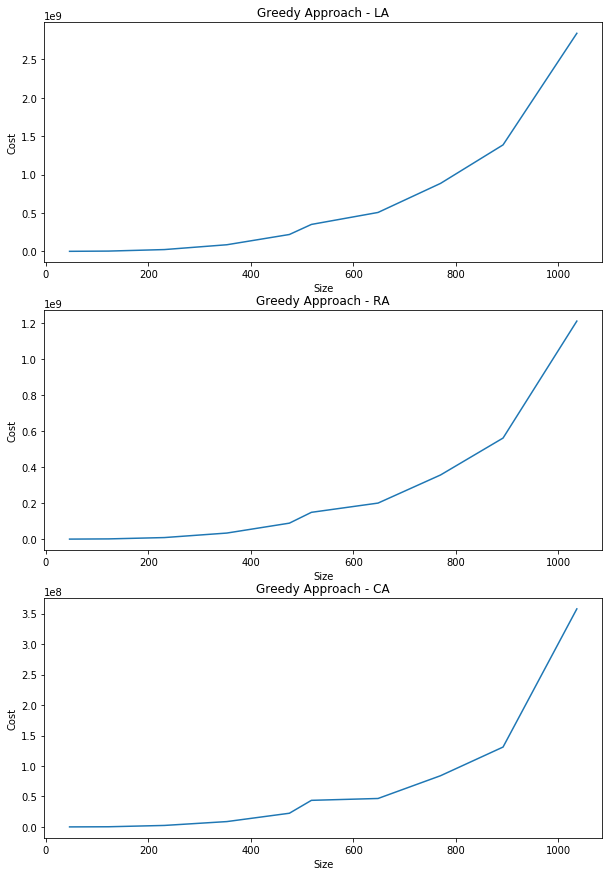

In [224]:
plt.figure(figsize=(10, 10))
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,15))

ax1.set_title('Greedy Approach - LA')
ax1.plot(resultsGLA.Size,resultsGLA.Costs)
ax1.set(xlabel='Size', ylabel='Cost')


ax2.set_title('Greedy Approach - RA')
ax2.plot(resultsGRA.Size,resultsGRA.Costs)
ax2.set(xlabel='Size', ylabel='Cost')


ax3.set_title('Greedy Approach - CA')
ax3.plot(resultsGCA.Size,resultsGCA.Costs)
ax3.set(xlabel='Size', ylabel='Cost')



